## Observations and Insights
#### Add your analysis here
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "left")
# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
merged_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mouse = merged_data.loc[merged_data.duplicated(["Mouse ID", "Timepoint"])]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
#cleaned dataframe
clean_df = merged_data.loc[merged_data["Mouse ID"] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Check the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupby_reg = clean_df.groupby("Drug Regimen")

mean_reg = groupby_reg.mean()["Tumor Volume (mm3)"]
median_reg = groupby_reg.median()["Tumor Volume (mm3)"]
variance_reg = groupby_reg.var()["Tumor Volume (mm3)"]
std_dev_reg = groupby_reg.std()["Tumor Volume (mm3)"]
sem_reg = groupby_reg.sem()["Tumor Volume (mm3)"]

#Use this straighforward method, create multiple series and put them all in a dataframe at the end.
sum_stat1 = pd.DataFrame({"Mean Tumor Volume": mean_reg, "Median Tumor Volume":median_reg, "Tumor Volume Variance":variance_reg, "Tumor Volume Std. Dev.": std_dev_reg, "Tumor Volume Std. Err.": sem_reg})
sum_stat1
#mean_reg_df1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use method to produce everything with a single groupby function
sum_stat2 = groupby_reg.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
sum_stat2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

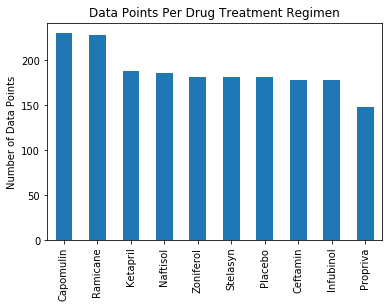

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_plt_df = clean_df["Drug Regimen"].value_counts()
bar_plt = bar_plt_df.plot(kind = "bar")
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Treatment Regimen")

plt.savefig("barchart_1")

plt.show()


In [9]:
# I used these values to create the num_mice list
bar_plt_df

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

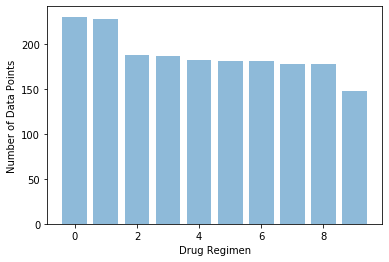

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
num_mice = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
x_axis = np.arange(len(num_mice))

plt.bar(x_axis, num_mice, alpha=0.5, align="center")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

plt.savefig("barchart_2")

plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


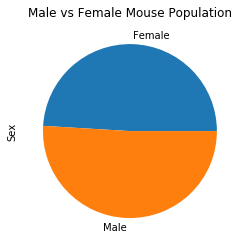

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#creating a dataframe thats groupped by sex, the prepared the necesarry data for the piechart
pie_df = clean_df.groupby("Sex").count()
pie_values = [pie_df["Mouse ID"]]
pie_labels = list(pie_df.index)

#plotting the piechart
plt.pie(pie_values, labels = pie_labels)

#titles and labels
plt.title("Male vs Female Mouse Population")
plt.ylabel("Sex")

#saving the piechart
plt.savefig("piechart_1")

#print
plt.show()

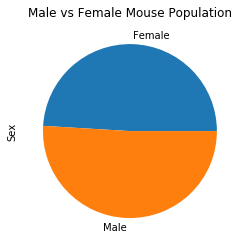

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#plotting the piechart
pie_df["Mouse ID"].plot.pie(y='pie_values')

#titles and labels
plt.title("Male vs Female Mouse Population")
plt.ylabel("Sex")

#saving the piechart
plt.savefig("piechart_2")

#print
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
## Calculate the final tumor volume of each mouse across each of the treatment regimens: Start by getting the last (greatest) timepoint for each mouse

mouse_list = clean_df["Mouse ID"].unique()

max_df = clean_df.drop_duplicates(subset = ["Mouse ID"], keep = 'last')
max_df = max_df.sort_values(["Mouse ID"], ascending = True)
max_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
1862,z435,Propriva,Female,12,26,10,48.710661,0
84,z578,Ramicane,Male,11,16,45,30.638696,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_reg_df = max_df.loc[max_df["Drug Regimen"] == drug, :]
    tumor_data = drug_reg_df["Tumor Volume (mm3)"]

    # add subset to tumor volume data list
    tumor_vol_list.append(tumor_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    lower_out = []
    upper_out = []
    
    for entry in tumor_data:
        if entry < lowerq:
            lower_out.append(entry)
        if entry > upperq:
            upper_out.append(entry)
    
    print(f"{drug}'s potential outliers... Lower: {lower_out}, Upper: {upper_out}")

    del lower_out
    del upper_out


Capomulin's potential outliers... Lower: [30.48598484, 28.43096411, 23.34359787, 31.02392294, 28.48403281, 31.896238399999998], Upper: [47.68596303, 41.48300765, 46.53920617, 41.58152074, 40.72857787, 40.65812366]
Ramicane's potential outliers... Lower: [29.12847181, 22.05012627, 30.56462509, 31.09533505, 30.27623175, 30.63869575], Upper: [43.04754260000001, 45.22086888, 43.41938077, 40.66771292, 43.16637266, 44.18345092]
Infubinol's potential outliers... Lower: [36.321345799999996, 47.01036401, 45.69933088, 46.25011212, 51.54243058, 50.00513807], Upper: [67.97341878, 66.08306589, 72.2267309, 67.28962147, 66.19691151, 67.68556862]
Ceftamin's potential outliers... Lower: [45.0, 47.784681799999994, 46.78453491, 45.0, 45.0, 45.0], Upper: [68.92318457, 67.74866174, 67.52748237, 64.63494887, 68.59474498, 64.72983655]


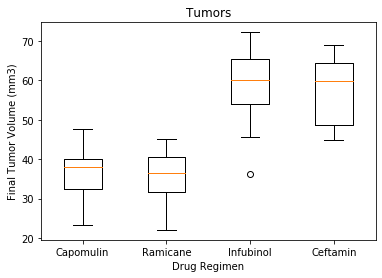

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Tumors")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")


ax1.boxplot(tumor_vol_list, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig("boxplot")

plt.show()

## Line and Scatter Plots

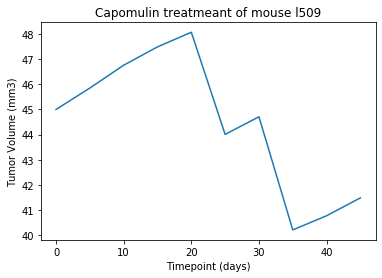

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
mouse_l509_df = capo_df.loc[capo_df["Mouse ID"] == "l509",:]

x_axis = mouse_l509_df["Timepoint"]
y_axis = mouse_l509_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)

plt.title("Capomulin treatmeant of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig("lineplot")

plt.show()

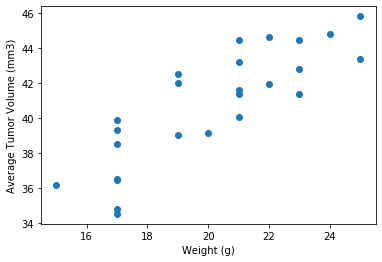

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_avg_df = capo_df.groupby(["Mouse ID"]).mean()

x_axis1 = capo_avg_df["Weight (g)"]
y_axis1 = capo_avg_df["Tumor Volume (mm3)"]

plt.scatter(x_axis1,y_axis1)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.savefig("lineplot")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


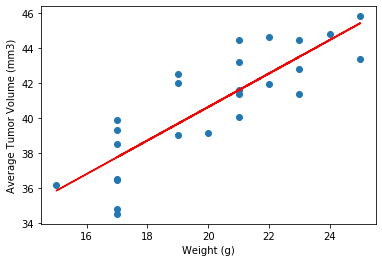

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis1, y_axis1)
rvalue = round(rvalue, 2)
print(f"The correlation between mouse weight and the average tumor volume is {rvalue}")

plt.scatter(x_axis1,y_axis1)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

regress_values = x_axis1 * slope + intercept
plt.plot(x_axis1,regress_values,"r-")

plt.savefig("regress_plot")

plt.show()